[...]

## Imports

In [23]:
#| echo: false

import sys
from pathlib import Path

src_path = Path('..')
sys.path.append(str(src_path.resolve()))

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from great_tables import GT
from pandas.plotting import scatter_matrix

from src.stylesheet import customize_plots
from src.inspection import make_df, display, display2

In [25]:
#| include: false
customize_plots()
%config InlineBackend.figure_format = 'svg'

## The dataset

### Load the data

We begin by exploring the data to get to know the features and patterns on which we will base our analysis.

In [38]:
#| output: false
#| warning: false
#| code-fold: true

if 'data' not in locals():
    data = pd.read_csv(
        "../data/raw/PBJ_Daily_Nurse_Staffing_Q1_2024.zip",
        encoding='ISO-8859-1',
        low_memory=False
    )
else:
    print("data loaded.")

data loaded.


### Inspect the data

In [39]:
data.sample(5)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
481867,205086,PINNACLE HEALTH & REHAB AT N BERWICK,NORTH BERWICK,ME,York,31,2024Q1,20240123,58,8.00,...,0.0,159.75,159.75,0.0,0.00,0.00,0.0,0.00,0.00,0.0
333320,155263,SYCAMORE CARE STRATEGIES,LOOGOOTEE,IN,Martin,101,2024Q1,20240319,33,8.95,...,0.0,62.54,62.54,0.0,0.00,0.00,0.0,0.00,0.00,0.0
386166,165386,COLONIAL MANOR OF ELMA,ELMA,IA,Howard,89,2024Q1,20240223,35,7.50,...,0.0,47.25,47.25,0.0,0.00,0.00,0.0,9.25,9.25,0.0
980747,395456,"GARDENS AT WYOMING VALLEY, THE",WILKES BARRE,PA,Luzerne,79,2024Q1,20240210,87,0.00,...,0.0,175.00,175.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
304194,145984,ALDEN NORTH SHORE REHAB & HCC,SKOKIE,IL,Cook,31,2024Q1,20240313,72,7.25,...,7.5,113.25,113.25,0.0,15.25,15.25,0.0,0.00,0.00,0.0


In [40]:
#| include: true
#| code-fold: true
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [41]:
#| include: true

data.describe().round(1)
# display(Markdown(data.describe().to_markdown()))

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,...,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0
mean,91.1,20240215.7,83.4,5.2,5.1,0.1,10.3,10.0,0.2,34.4,...,6.5,171.2,158.2,13.0,4.2,4.2,0.1,8.5,8.3,0.2
std,99.2,83.0,49.1,4.5,4.5,0.9,14.9,14.6,1.8,34.7,...,16.2,113.7,106.3,32.6,13.1,12.7,2.1,17.6,17.2,2.2
min,1.0,20240101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,20240123.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,97.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,69.0,20240215.0,76.0,8.0,8.0,0.0,7.5,7.4,0.0,25.6,...,0.0,148.1,136.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,117.0,20240309.0,104.0,8.0,8.0,0.0,16.0,16.0,0.0,44.8,...,5.8,217.0,203.1,11.0,0.0,0.0,0.0,11.2,10.8,0.0
max,840.0,20240331.0,743.0,327.8,327.8,42.0,266.2,266.2,92.5,908.6,...,454.0,1857.7,1573.1,694.3,452.0,279.0,280.5,395.6,395.6,128.9


### Group the features

In [42]:
df = data.loc[:, [
    "STATE",
    "COUNTY_NAME", "COUNTY_FIPS",
    "CITY",
    "PROVNAME", "PROVNUM",
    # "MDScensus"
]].value_counts()
df.to_frame()
# GT(df.reset_index().head(n=5))

count
STATE COUNTY_NAME COUNTY_FIPS CITY           PROVNAME                                           PROVNUM       
AK    Anchorage   20          ANCHORAGE      PRESTIGE CARE & REHAB CENTER OF ANCHORAGE          025025      91
OH    Allen       3           LIMA           LIMA CONVALESCENT HOME                             366297      91
                                             SHAWNEE MANOR                                      365361      91
                                             SPRINGS OF LIMA THE                                366464      91
                                             SPRINGVIEW MANOR                                   366221      91
...                                                                                                        ...
IN    Tippecanoe  157         WEST LAFAYETTE HERITAGE HEALTHCARE                                155402      91
                                             INDIANA VETERANS HOME                              155787      91
                                             UNIVERSITY PLACE HEALTH CENTER AND ASSISTED LIVING 155725      91
                                             WESTMINSTER VILLAGE - WEST LAFAYETTE               155177      91
WY    Weston      45          NEWCASTLE      WESTON COUNTY HEALTH SERVICES                      535023      91

[14626 rows x 1 columns]

In [43]:
display2(
    "data['STATE'].value_counts()",
    "data['COUNTY_NAME'].value_counts()",
    "data['CITY'].value_counts()",
    "data['PROVNAME'].value_counts()",
    "data['MDScensus'].value_counts()",
    width="340px",
    globs=globals()
)

In [44]:
data[["CY_Qtr", "WorkDate", "MDScensus"]]

,CY_Qtr,WorkDate,MDScensus
0,2024Q1,20240101,50
1,2024Q1,20240102,49
2,2024Q1,20240103,49
3,2024Q1,20240104,50
4,2024Q1,20240105,51
...,...,...,...
1330961,2024Q1,20240327,81
1330962,2024Q1,20240328,83
1330963,2024Q1,20240329,85
1330964,2024Q1,20240330,82


### Clean the data

## Explore the dataset

### Visualize distributions

### Visualize relationships

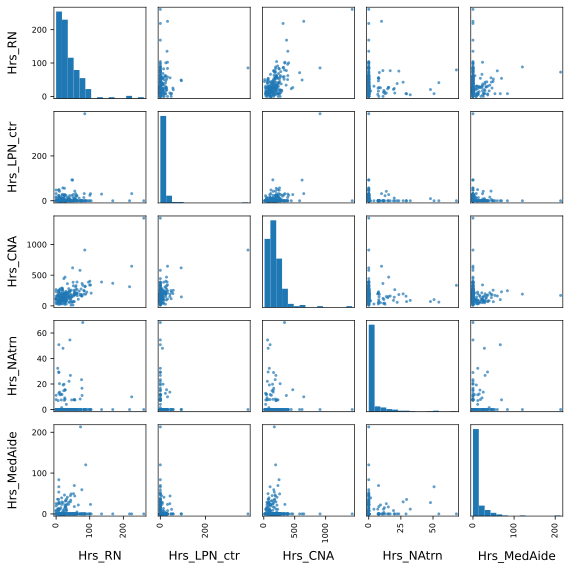

In [33]:
#| include: true
#| label: fig-scatter-matrix
#| fig-cap: Scatter matrix of nursing worker working hours
#| column: body-outset-right

attributes = ["Hrs_RN", "Hrs_LPN_ctr", "Hrs_CNA", "Hrs_NAtrn", "Hrs_MedAide"]
n = len(attributes)

fig, axs = plt.subplots(n, n, figsize=(8, 8))
scatter_matrix(
    data[attributes].sample(200),
    ax=axs, alpha=.7,
    hist_kwds=dict(bins=15, linewidth=0)
)
fig.align_ylabels(axs[:, 0])
fig.align_xlabels(axs[-1, :])
for ax in axs.flatten():
    ax.tick_params(axis='both', which='both', length=3.5)

# save_fig("scatter_matrix_plot")

plt.show()

### Compare groups

## Feature engineer

### Join geographical data

### Join seasonal data

## Analyze geography

## Analyze seasonality

## Model

## Extra visualizations

### Sparklines

In [34]:
# TODO: pivot on day

data_pivoted = data.pivot_table(
    index="STATE",
    columns="WorkDate",
    values="Hrs_RN",
    aggfunc='mean'
)

# Resetting the index for easier column access
# data_pivoted.reset_index(inplace=True)
data_pivoted.head()

WorkDate,20240101,20240102,20240103,20240104,20240105,20240106,20240107,20240108,20240109,20240110,...,20240322,20240323,20240324,20240325,20240326,20240327,20240328,20240329,20240330,20240331
STATE,,,,,,,,,,,,,,,,,,,,,
AK,55.602000,51.898667,51.343333,59.512000,64.569333,58.176000,57.300000,60.578000,58.515333,59.689333,...,62.525333,53.939333,57.629333,63.704000,63.604000,63.441333,65.700000,68.357333,54.641333,54.074000
AL,26.901570,39.632601,40.746816,40.160404,38.657937,26.692466,26.345874,38.713184,40.700897,41.691390,...,38.314529,26.940000,26.800493,39.800852,41.089238,40.966502,39.004753,36.495605,27.455964,26.797085
AR,11.224470,12.514240,13.073456,13.465346,12.282304,12.595714,12.768341,13.161244,13.578756,13.734608,...,13.382811,13.832995,13.381382,13.655576,13.879217,13.432074,14.206129,13.426175,13.525300,11.958571
AZ,33.938777,36.368273,37.029137,36.852158,36.982302,33.031655,31.628849,38.353525,38.457194,38.849496,...,41.056331,34.905971,32.476691,40.276331,39.088633,40.678417,40.659353,39.422662,32.910216,31.528417
CA,29.643939,32.223912,32.686316,33.311368,32.586842,29.678272,29.393482,32.683263,33.510465,33.730807,...,34.460474,31.168947,30.193833,33.812158,34.870868,34.675798,34.780860,33.950561,30.720272,29.810675


In [35]:
# (
#     GT(data_pivoted, rowname_col="STATE")
#     .fmt_nanoplot(
#         columns=data_pivoted.columns[1:],
#         reference_line="mean",
#         reference_area=["min", "q1"]
#     )
#     .fmt_nanoplot(
#         columns=data_pivoted.columns[1:],
#         plot_type="bar",
#         reference_line="max",
#         reference_area=["max", "median"]
#     )
# )

## SQL

## Archive

In [36]:
#| include: false
import pandas as pd
df = pd.DataFrame({'name': ['arizona', '', 'berlin', 'london']})

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geo_clipboard")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [37]:
#| include: false
df

,name,location,point
0,arizona,"(Arizona, United States, (34.395342, -111.7632...","(34.395342, -111.763275, 0.0)"
1,,None,None
2,berlin,"(Berlin, Deutschland, (52.510885, 13.3989367))","(52.510885, 13.3989367, 0.0)"
3,london,"(London, Greater London, England, United Kingd...","(51.4893335, -0.14405508452768728, 0.0)"
